In [2]:
import iris 
import matplotlib.pyplot as plt
import iris.coord_categorisation
import numpy as np
import cartopy as cart
import os
import pandas as pd
import cartopy as cart
import glob
import scipy.stats as sstat

In [3]:
#--------------------------------------------------------------------------
# LOAD DATAFRAMES
#--------------------------------------------------------------------------

os.chdir('C:\\Users\\fb428\\OneDrive - University of Exeter\\Documents\\PhD\\papers\\manuscript3\\figures_and_data\\')

site_info = pd.read_csv('figure_making\\output_files\\station_info.csv')

site = pd.read_csv('site_daily.csv')
UKESM = pd.read_csv('UKESM_daily.csv')


In [15]:
#--------------------------------------------------------------------------
# MERGE ALL SITES AND ADD NAMES
#--------------------------------------------------------------------------

locs = site_info[['item', 'name']].drop_duplicates()
chosen_data = site_info[(site_info['name'] != 'Mt. Kenya') & (site_info['name'] != 'Tanah Rata')]

site_names = pd.merge(site, locs, on=['item'])
UKESM_names = pd.merge(UKESM, locs, on=['item'])

n = len(locs)

names = chosen_data['name'].drop_duplicates()

m = len(names)

In [23]:
site_names.dropna(subset=['scaled_day'], inplace=True)

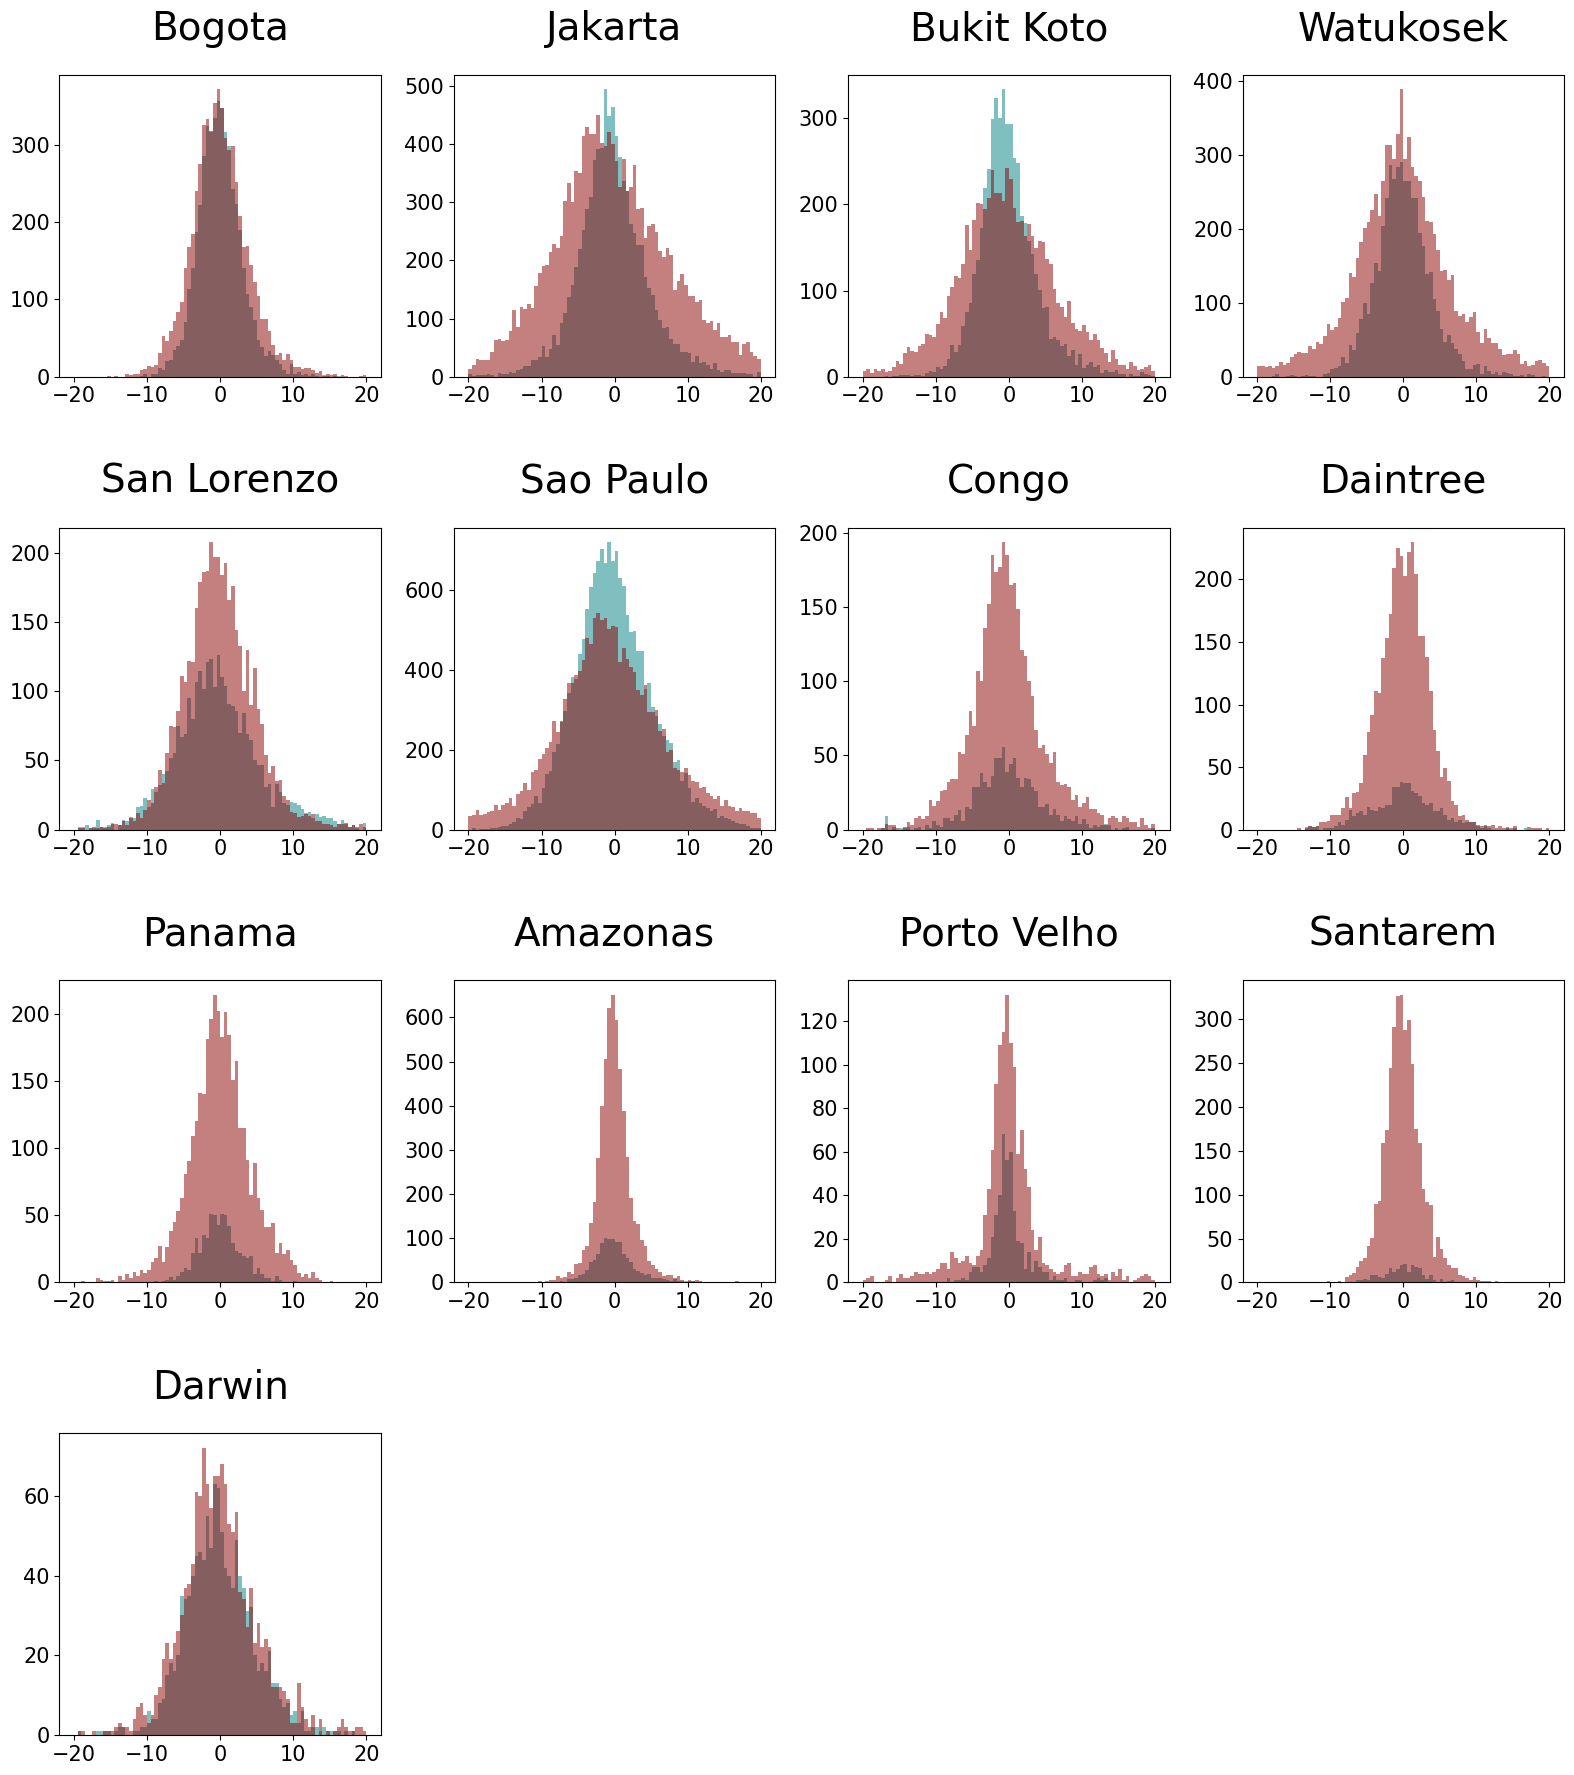

In [24]:
#----------------------------------------------------------------
# Daily distribution
#----------------------------------------------------------------

plt.figure(figsize=(16,18))
plt.rcParams['font.size']=15


for i in range(m):
    plt.subplot(4,4,i+1)
    
    site_name = list(names)[i]
    
#--------------------------------mean data--------------------------------------------
     
    site_df = site_names[site_names['name'] == site_name]    
    site_data = site_df['scaled_day'].values
    
    UKESM_df = UKESM_names[UKESM_names['name'] == site_name]    
    UKESM_data = UKESM_df['scaled_day'].values
    
#-------------------------------- plot--------------------------------------------
    
    # points + error bars
    plt.hist( site_data, stacked=True, bins=np.linspace(-20,20,81), alpha=0.5,
               color='teal')
    
    plt.hist(UKESM_data, stacked=True, bins=np.linspace(-20,20,81), alpha=0.5,
                 color='darkred')

    # axes
    plt.title(site_name, size=28, pad=25)
    #plt.ylabel('O3 / ppb', size = 20, labelpad = 30)
    #plt.ylim(0,80)


plt.tight_layout()
plt.subplots_adjust(hspace=0.5)

#plt.savefig('daily.png', dpi=300)

### Skew and Kurtosis

In [25]:
#--------------------------------------------------------------------------
# SITES
#--------------------------------------------------------------------------

#make a dictionary of dataframes for each item

data_by_item = {elem : pd.DataFrame() for elem in list(names)}

## add dataframes

for key in data_by_item.keys():
    data_by_item[key] = site_names[:][site_names.name == key]
    
## loop over dict

site_kurtosis = [sstat.kurtosis(data_by_item[site].scaled_day.values, bias=True, fisher=True) for site in data_by_item.keys()]
site_skew = [sstat.skew(data_by_item[site].scaled_day.values, bias=True) for site in data_by_item.keys()]
site_std = [sstat.tstd(data_by_item[site].scaled_day.values) for site in data_by_item.keys()]

In [26]:
site_kurtosis

[2.4313480533525302,
 27.451252630150243,
 3.8060427101589704,
 1.8757190535676083,
 6.583879571539194,
 0.7394373598373871,
 1.8641721293937268,
 0.7297150311338148,
 0.2440205940915514,
 3.0561493016060544,
 5.15727767613329,
 0.14753363582409795,
 1.740407129913228]

In [27]:
#--------------------------------------------------------------------------
# UKESM
#--------------------------------------------------------------------------

#make a dictionary of dataframes for each item

data_by_item = {elem : pd.DataFrame() for elem in list(names)}

## add dataframes

for key in data_by_item.keys():
    data_by_item[key] = UKESM_names[:][UKESM_names.name == key]
    
## loop over dict

site_kurtosis_UKESM = [sstat.kurtosis(data_by_item[site].scaled_day.values-1, bias=True, fisher=True) for site in data_by_item.keys()]
site_skew_UKESM = [sstat.skew(data_by_item[site].scaled_day.values-1, bias=True) for site in data_by_item.keys()]
site_std_UKESM = [sstat.tstd(data_by_item[site].scaled_day.values-1) for site in data_by_item.keys()]

In [28]:
distribution_df = pd.DataFrame({'name': list(names), 'kurtosis': site_kurtosis, 'kurtosis_UKESM': site_kurtosis_UKESM, 
              'skew': site_skew, 'skew_UKESM': site_skew_UKESM,
              'scaled_std': site_std, 'scaled_std_UKESM': site_std_UKESM})

In [29]:
chosen_data = distribution_df[(distribution_df['name'] != 'Mt. Kenya') & (distribution_df['name'] != 'Tanah Rata')& (distribution_df['name'] != 'Daintree')]

In [30]:
from scipy import stats

In [31]:
r_sq_all = stats.pearsonr(chosen_data['skew'].values, chosen_data['skew_UKESM'].values)
print('r2 skew: ', r_sq_all[0]**2)
print('p skew: ', r_sq_all[1])

r_sq_all = stats.pearsonr(chosen_data['scaled_std'].values, chosen_data['scaled_std_UKESM'].values)
print('r2 std: ', r_sq_all[0]**2)
print('p std: ', r_sq_all[1])

r_sq_all = stats.pearsonr(chosen_data['kurtosis'].values, chosen_data['kurtosis_UKESM'].values)
print('r2 kurtosis: ', r_sq_all[0]**2)
print('p kurtosis: ', r_sq_all[1])

r2 skew:  0.07429616125717174
p skew:  0.39137511007467907
r2 std:  0.3367661594862892
p std:  0.04790548658889711
r2 kurtosis:  0.005329994738208525
p kurtosis:  0.8216055063242784


In [32]:
print('site skew: ', np.mean(chosen_data['skew'].values) )
print('ukesm skew: ', np.mean(chosen_data['skew_UKESM'].values))

print('site std: ', np.mean(chosen_data['scaled_std'].values) )
print('ukesm sdt: ', np.mean(chosen_data['scaled_std_UKESM'].values))

print('site kurtosis: ', np.mean(chosen_data['kurtosis'].values) )
print('ukesm kurtosis: ', np.mean(chosen_data['kurtosis_UKESM'].values))

site skew:  0.66109888421951
ukesm skew:  0.5864478949791231
site std:  4.375471158580273
ukesm sdt:  5.9196617803608715
site kurtosis:  4.591436653797324
ukesm kurtosis:  3.4810282456815176


([<matplotlib.axis.XTick at 0x1e3a0397fd0>,
 [Text(0, 0, 'Bogota'),
  Text(1, 0, 'Jakarta'),
  Text(2, 0, 'Bukit Koto'),
  Text(3, 0, 'Watukosek'),
  Text(4, 0, 'San Lorenzo'),
  Text(5, 0, 'Sao Paulo'),
  Text(6, 0, 'Congo'),
  Text(7, 0, 'Daintree'),
  Text(8, 0, 'Panama'),
  Text(9, 0, 'Amazonas'),
  Text(10, 0, 'Porto Velho'),
  Text(11, 0, 'Santarem'),
  Text(12, 0, 'Darwin')])

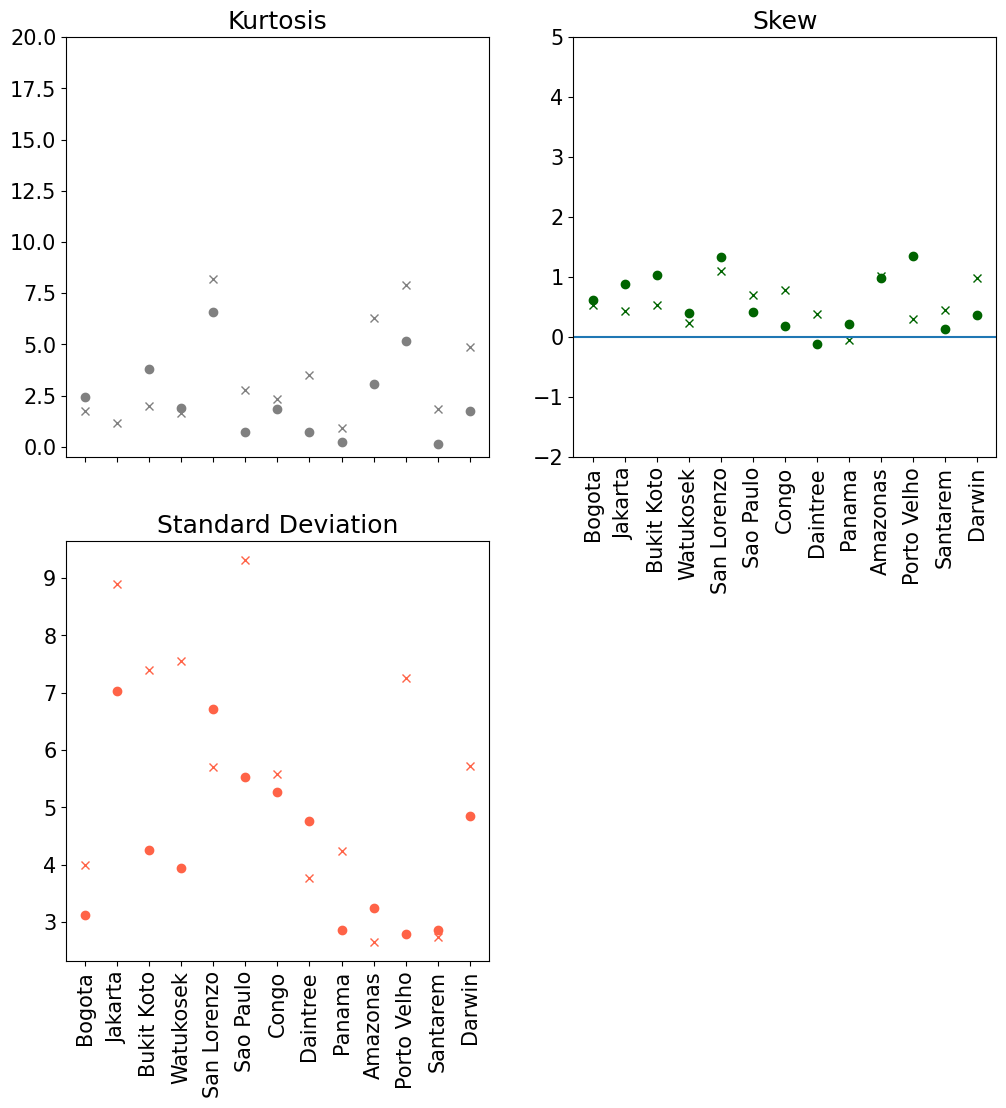

In [33]:
plt.figure(figsize=(12,12))

plt.subplot(221)
plt.plot(distribution_df['kurtosis'], 'o', color='grey')
plt.plot(distribution_df['kurtosis_UKESM'], 'x', color='grey')
plt.xticks(range(m), ['']*m, rotation=90)
plt.title('Kurtosis')
plt.ylim(-0.5,20)

plt.subplot(222)
plt.plot(distribution_df['skew'], 'o', color='darkgreen')
plt.plot(distribution_df['skew_UKESM'], 'x', color='darkgreen')
plt.xticks(range(m), list(names), rotation=90)
plt.title('Skew')
plt.axhline(0)
plt.ylim(-2,5)

plt.subplot(223)
plt.plot(distribution_df['scaled_std_UKESM'], 'x', color='tomato')
plt.plot(distribution_df['scaled_std'], 'o', color='tomato')
plt.title('Standard Deviation')
plt.xticks(range(m), list(names), rotation=90)
#plt.ylim(-0.5,5)



In [34]:
distribution_df.to_csv('daily_distribution_stats.csv')

Text(0.5, 1.0, 'Standard Deviation')

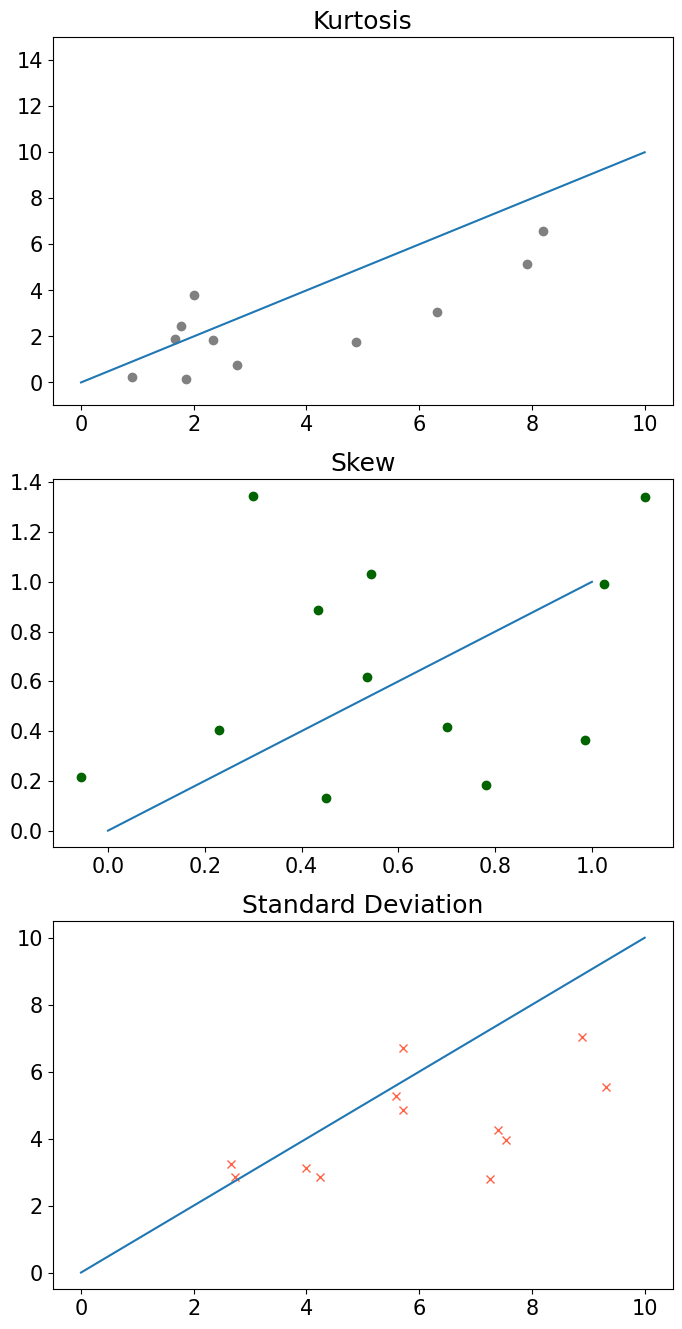

In [35]:
plt.figure(figsize=(8,22))

plt.subplot(411)
plt.plot(chosen_data['kurtosis_UKESM'], chosen_data['kurtosis'], 'o', color='grey')
plt.plot([0,10], [0,10])
plt.ylim(-1,15)
plt.title('Kurtosis')

plt.subplot(412)
plt.plot(chosen_data['skew_UKESM'], chosen_data['skew'], 'o', color='darkgreen')
plt.plot([0,1], [0,1])
plt.title('Skew')

plt.subplot(413)
plt.plot(chosen_data['scaled_std_UKESM'], chosen_data['scaled_std'], 'x', color='tomato')
plt.title('Standard Deviation (scaled)')
plt.plot([0,10], [0,10])



plt.title('Standard Deviation')